Control Conversion Rate: 0.1145
Test Conversion Rate: 0.1453
Required sample size per group: 4144
Test Duration (in days): 2 days
Z-statistic: 6.4781
P-value: 0.0000
The test result is statistically significant. We reject the null hypothesis.


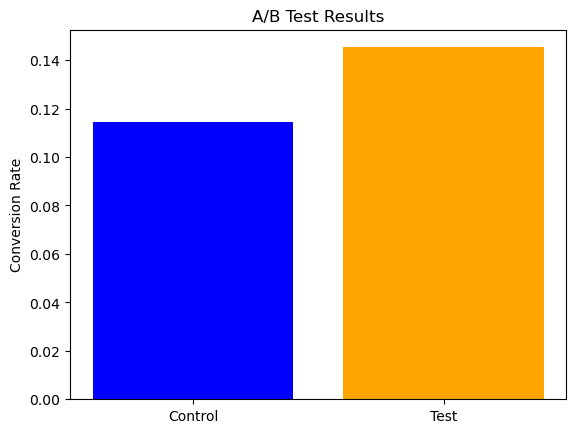

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Simulated Data for A/B Test
np.random.seed(42)

# Assuming we are testing a new feature on an e-commerce platform
n_control = 10000  # Control group size
n_test = 10000  # Test group size

# Control group: average conversion rate of 12%
control_conversion_rate = 0.12
control_group = np.random.binomial(1, control_conversion_rate, n_control)

# Test group: we expect a 2% improvement (conversion rate of 14%)
test_conversion_rate = 0.14
test_group = np.random.binomial(1, test_conversion_rate, n_test)

# Conversion metrics
control_conversion = np.mean(control_group)
test_conversion = np.mean(test_group)

print(f"Control Conversion Rate: {control_conversion:.4f}")
print(f"Test Conversion Rate: {test_conversion:.4f}")

# 1. Metric Selection
# We use the conversion rate (the percentage of visitors that make a purchase) as our primary metric.

# 2. Randomization Unit: Each user visiting the website is randomly assigned to the control or test group.

# 3. Target Population: Visitors to the e-commerce website, excluding bots or duplicate visits.

# 4. Sample Size Calculation using Power Analysis
# We use the formula to calculate the sample size needed for detecting the effect:
from statsmodels.stats.power import zt_ind_solve_power

# Parameters: expected effect size, alpha (significance level), beta (1 - power), baseline rate, etc.
effect_size = (test_conversion_rate - control_conversion_rate) / np.sqrt(
    control_conversion_rate * (1 - control_conversion_rate)
)

alpha = 0.05  # significance level
power = 0.8   # 80% power

sample_size = zt_ind_solve_power(effect_size, alpha=alpha, power=power, ratio=1)
print(f"Required sample size per group: {int(sample_size)}")

# 5. Test Duration Calculation
# Assuming traffic is 5000 visitors per day.
daily_traffic = 5000
test_duration = np.ceil(sample_size * 2 / daily_traffic)  # Multiply by 2 to account for both groups
print(f"Test Duration (in days): {int(test_duration)} days")

# 6. Statistical Significance Test (Hypothesis Testing)
# Perform a two-sided Z-test to see if the difference between control and test groups is statistically significant
def z_test(control, test):
    control_mean = np.mean(control)
    test_mean = np.mean(test)
    pooled_prob = (control_mean + test_mean) / 2
    se = np.sqrt(pooled_prob * (1 - pooled_prob) * (1 / len(control) + 1 / len(test)))
    z_stat = (test_mean - control_mean) / se
    p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))  # two-tailed test
    return z_stat, p_value

z_stat, p_value = z_test(control_group, test_group)
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# 7. Results Interpretation
if p_value < alpha:
    print("The test result is statistically significant. We reject the null hypothesis.")
else:
    print("The test result is not statistically significant. We fail to reject the null hypothesis.")

# 8. Visualization
plt.bar(['Control', 'Test'], [control_conversion, test_conversion], color=['blue', 'orange'])
plt.ylabel('Conversion Rate')
plt.title('A/B Test Results')
plt.show()

# 9. Alternatives to A/B Testing
# - Multi-Armed Bandit: Dynamic exploration of different variations based on performance.
# - Quasi-Experiment: Observational study using historical data.
# - Simulations: Run what-if scenarios based on assumptions and pre-existing data.

# END of A/B Test Project Script
